Assigment for the first lecture

Prepare the data:

1. Download the two different datasets (for white and red wines): 

https://archive.ics.uci.edu/ml/datasets/Wine+Quality.

2. Create a new column for the type of wine (eg. 1 for red and 0 for white). 
3. Fuse them into one dataset (hint: Use pandas).
4. Split dataset into training and test parts 
(hint: Use `train_test_split` from Scikit-Learn, it works directly with Pandas)

Then run the following tasks:

A) Use regression to predict the alcohol level of the wine on a test set.
B) Use binary classification to predict the type of wine on a test set.
C) Use multiclass classification to predict the quality of the wine on a test set.

Slide Type

For each task test two classifiers, report accuracy with the default parameters. Perform some manual optimization of the parameters (at least 5 different values for each parameter) and plot the new obtained accuracy as a function of the chosen parameter (max. 2). Using your best result, plot the feature importance for the binary classification or the coefficient magnitudes for regression (hint: choose your classifier accordingly).


In [367]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [368]:
# Download red wine data to Pandas dataframe
redWine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",delimiter=";")
# Check if there are some null values
print("Are there are null values in redWine data frame? "+ str(redWine.isnull().values.any()))
print("redWine shape is:")
print(redWine.shape)
# Add 1 as red wine type
redWine["type"] = 1
print(redWine.head())

# Download white wine data to Pandas dataframe
whiteWine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv",delimiter=";")
# Check if there are some null values
print("Are there are null values in whiteWine data frame? "+ str(whiteWine.isnull().values.any()))
print("whiteWine shape is:")
print(whiteWine.shape)
# Add 0 as white wine type
whiteWine["type"] = 0
# Merge redWine and whiteWine dataframe 
wine = pd.concat([redWine, whiteWine],sort=False)
print("the merged wine dataframe shape is:")
print(wine.shape)

Are there are null values in redWine data frame? False
redWine shape is:
(1599, 12)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

  

In [369]:
X = wine.iloc[:,:10].values
y_reg = wine.iloc[:,10].values

X_train, X_test, y_train, y_test = train_test_split(X, y_reg, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lr.coef_ != 0)))


Training set score: 0.78
Test set score: 0.81
Number of features used: 10


When random_state value is 42 in LinearRegression, test score is greater than traing score, I suppse 
underfitting happens in this case.

In [370]:
# Train Ridge model with alpha default value = 1
ridge = Ridge().fit(X_train, y_train)

print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(ridge.coef_ != 0)))

Training set score: 0.30
Test set score: 0.29
Number of features used: 10


In [371]:
# Train Ridge model with alpha value = 0.001
ridge0001 = Ridge(alpha =0.001).fit(X_train, y_train)

print("Training set score: {:.2f}".format(ridge0001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge0001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(ridge0001.coef_ != 0)))

Training set score: 0.78
Test set score: 0.80
Number of features used: 10


In [372]:
# Train Ridge model with alpha value = 0.01
ridge001 = Ridge(alpha =0.01).fit(X_train, y_train)

print("Training set score: {:.2f}".format(ridge001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(ridge001.coef_ != 0)))

Training set score: 0.65
Test set score: 0.66
Number of features used: 10


In [373]:
# Train Ridge model with alpha value = 0.1
ridge01 = Ridge(alpha =0.1).fit(X_train, y_train)

print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(ridge01.coef_ != 0)))

Training set score: 0.38
Test set score: 0.36
Number of features used: 10


In [374]:
# Train Ridge model with alpha value = 5
ridge5 = Ridge(alpha =5).fit(X_train, y_train)

print("Training set score: {:.2f}".format(ridge5.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge5.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(ridge5.coef_ != 0)))

Training set score: 0.27
Test set score: 0.26
Number of features used: 10


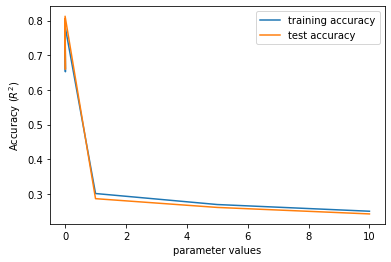

In [375]:
# Plot ridge/lasso accuracy with different alpha values

training_accuracy = []
test_accuracy = []

def calculate_accuracy(parameter_values, model_name):
    for parameter_value in parameter_values:
        # build the model
        if model_name == 'ridge':
            model = Ridge(alpha =parameter_value).fit(X_train, y_train)
        elif model_name == 'lasso':
            model = Lasso(alpha =parameter_value, max_iter=100000).fit(X_train, y_train)
        elif model_name == 'logistic':
            model = LogisticRegression(C =parameter_value, solver='lbfgs',max_iter=100000).fit(X_train, y_train)
        else:
            model = KNeighborsClassifier(n_neighbors=parameter_value).fit(X_train, y_train)
        # record training set accuracy
        training_accuracy.append(model.score(X_train, y_train))
        # record generalization accuracy
        test_accuracy.append(model.score(X_test, y_test))
    
%matplotlib inline
import matplotlib.pyplot as plt

def plot_accuracy(parameter_values, model_name):
    calculate_accuracy(parameter_values, model_name)
    plt.plot(parameter_values, training_accuracy, label="training accuracy")
    plt.plot(parameter_values, test_accuracy, label="test accuracy")
    plt.ylabel("Accuracy ($R^2$)")
    plt.xlabel("parameter values")
    plt.legend()
    training_accuracy.clear()
    test_accuracy.clear()


# Define different alpha values for ridge
alpha_values = [0.001,0.01,0,1,1,5,10]

plot_accuracy(alpha_values, 'ridge')    


In [376]:
# Train lasso model with alpha default value =1
lasso = Lasso(max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.11
Test set score: 0.09
Number of features used: 2


In [377]:
# Train lasso model with alpha value =0.0001
lasso00001 = Lasso(alpha =0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.78
Test set score: 0.81
Number of features used: 10


In [378]:
# Train lasso model with alpha value =0.001
lasso0001 = Lasso(alpha =0.001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso0001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso0001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso0001.coef_ != 0)))

Training set score: 0.43
Test set score: 0.42
Number of features used: 10


In [379]:
# Train lasso model with alpha value =0.01
lasso001 = Lasso(alpha =0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.22
Test set score: 0.21
Number of features used: 7


In [380]:
# Train lasso model with alpha value =0.1
lasso01 = Lasso(alpha =0.1, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso01.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso01.coef_ != 0)))

Training set score: 0.17
Test set score: 0.16
Number of features used: 4


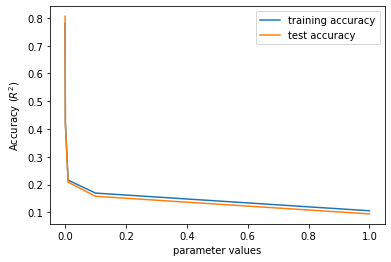

In [381]:
# Define different alpha values for lasso
alpha_values = [0.0001,0.001,0.01,0.1,1]

plot_accuracy(alpha_values, 'lasso')    

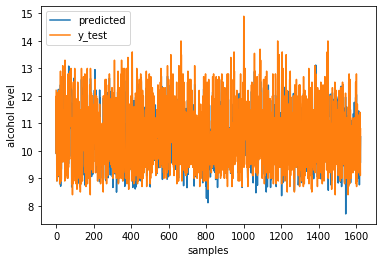

In [382]:
# In this project, actually Ridge is almost same as lasso.
# We use Ridge to predict
# Train Ridge model with alpha value = 0.001
ridge0001 = Ridge(alpha =0.001).fit(X_train, y_train)
alcohol_level_predicted = ridge0001.predict(X_test)

def plot_predict():
    plt.plot(list(range(len(y_test))), alcohol_level_predicted, label="predicted")
    plt.plot(list(range(len(y_test))), y_test, label="y_test")
    plt.ylabel("alcohol level")
    plt.xlabel("samples")
    plt.legend()
    
plot_predict()

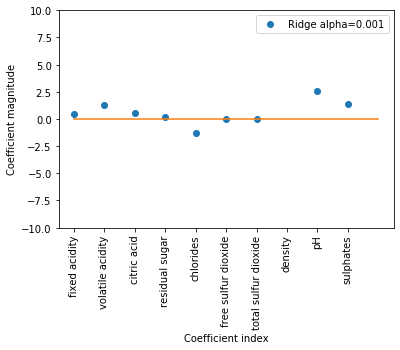

In [383]:
# Plot coefficient magnitudes for ridge
column_names = list(pd.DataFrame(wine.iloc[:,:10]).columns.values.tolist())

def plot_coefficient_magnitudes():
    plt.plot(ridge0001.coef_, 'o', label="Ridge alpha=0.001")
    plt.xticks(range(len(column_names)), column_names, rotation=90)
    plt.plot((0, len(column_names)), (0, 0))
    plt.ylim(-10, 10)
    plt.xlabel("Coefficient index")
    plt.ylabel("Coefficient magnitude")
    plt.legend()

plot_coefficient_magnitudes()

Density's coefficient is out of range in this case.

In [384]:
# Use binary classification to predict the type of wine on a test set.
X = wine.iloc[:,:11].values
y_class = wine.iloc[:,12].values

from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y_class, random_state=42)

# Train logisitic regression model with C default value = 1
logreg = LogisticRegression(solver='lbfgs',max_iter=100000).fit(X_train, y_train)

print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.986
Test set score: 0.982


In [385]:
# Train logisitic regression model with C value = 100
logreg100 = LogisticRegression(C=100,solver='lbfgs',max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.990
Test set score: 0.987


In [386]:
# Train logisitic regression model with C value = 0.01
logreg001 = LogisticRegression(C=0.01,solver='lbfgs',max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.951
Test set score: 0.943


In [387]:
# Train logisitic regression model with C value = 0.1
logreg01 = LogisticRegression(C=0.1,solver='lbfgs',max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg01.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg01.score(X_test, y_test)))

Training set score: 0.973
Test set score: 0.967


In [388]:
# Train logisitic regression model with C value = 10
logreg10 = LogisticRegression(C=10,solver='lbfgs',max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg10.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg10.score(X_test, y_test)))

Training set score: 0.989
Test set score: 0.985


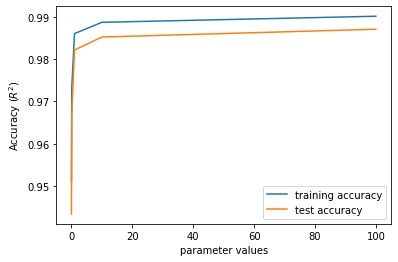

In [389]:
# Define different C values for logistic regression
C_values = [0.01,0.1,1,10,100]

plot_accuracy(C_values, 'logistic')   

In [390]:
# Train KNeighborsClassifier with neighbors = 10
from sklearn.neighbors import KNeighborsClassifier
clf10 = KNeighborsClassifier(n_neighbors=10)
clf10.fit(X_train, y_train)
print("Training set score: {:.3f}".format(clf10.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(clf10.score(X_test, y_test)))

Training set score: 0.948
Test set accuracy: 0.934


In [391]:
# Train KNeighborsClassifier with neighbors = 1
from sklearn.neighbors import KNeighborsClassifier
clf1 = KNeighborsClassifier(n_neighbors=1)
clf1.fit(X_train, y_train)
print("Training set score: {:.3f}".format(clf1.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(clf1.score(X_test, y_test)))


Training set score: 1.000
Test set accuracy: 0.946


In [392]:
# Train KNeighborsClassifier with neighbors = 5
from sklearn.neighbors import KNeighborsClassifier
clf5 = KNeighborsClassifier(n_neighbors=5)
clf5.fit(X_train, y_train)
print("Training set score: {:.3f}".format(clf5.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(clf5.score(X_test, y_test)))

Training set score: 0.956
Test set accuracy: 0.939


In [393]:
# Train KNeighborsClassifier with neighbors = 15
from sklearn.neighbors import KNeighborsClassifier
clf15 = KNeighborsClassifier(n_neighbors=15)
clf15.fit(X_train, y_train)
print("Training set score: {:.3f}".format(clf15.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(clf15.score(X_test, y_test)))

Training set score: 0.945
Test set accuracy: 0.936


In [394]:
# Train KNeighborsClassifier with neighbors = 20
from sklearn.neighbors import KNeighborsClassifier
clf20 = KNeighborsClassifier(n_neighbors=20)
clf20.fit(X_train, y_train)
print("Training set score: {:.3f}".format(clf20.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(clf20.score(X_test, y_test)))

Training set score: 0.940
Test set accuracy: 0.931


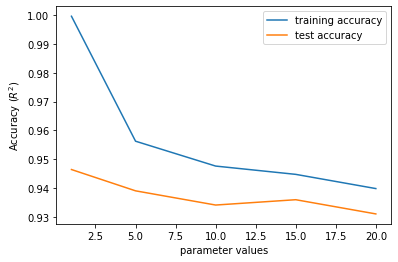

In [395]:
# Define different neighbor values for logistic regression
neighbor_values = [1,5,10,15,20]

plot_accuracy(neighbor_values, 'KNeighborsC')  

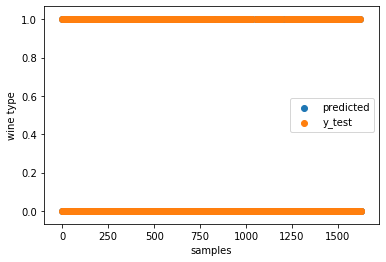

In [396]:
# For binary classification of wine type, logistic regession with C = 100 is the best
wine_type_predicted = logreg100.predict(X_test)
def plot_predict():
    plt.scatter(list(range(len(y_test))), wine_type_predicted, label="predicted")
    plt.scatter(list(range(len(y_test))), y_test, label="y_test")
    plt.ylabel("wine type")
    plt.xlabel("samples")
    plt.legend()
    
plot_predict()

In [397]:
#Since logisitc regession and KNeighborsClassifier do not have feature_importances_ attribute.
#We will try GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.999
Accuracy on test set: 0.996


Text(0, 0.5, 'Feature')

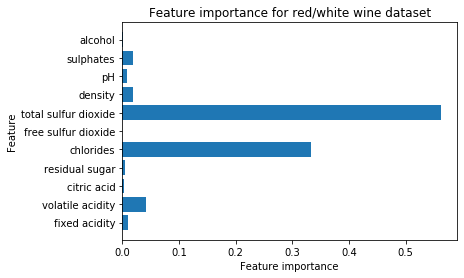

In [398]:
# GradientBoostingClassifier has very high training and test scores.
column_names = list(pd.DataFrame(wine.iloc[:,:11]).columns.values.tolist())

plt.barh(range(len(column_names)), gbrt.feature_importances_, align='center')
plt.yticks(np.arange(len(column_names)), column_names)
plt.title('Feature importance for red/white wine dataset')
plt.xlabel("Feature importance")
plt.ylabel("Feature")

In [419]:
# Use multiclass classification to predict the quality of the wine on a test set
X = wine.iloc[:,:11].values
y_quality = wine.iloc[:,11].values

X_train, X_test, y_train, y_test = train_test_split(X, y_quality, random_state=42)

from sklearn.model_selection import GridSearchCV
param_test1 = {'n_estimators':range(20,120,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(random_state=0), 
                       param_grid = param_test1, scoring='accuracy',cv=5,return_train_score=False)
gsearch1.fit(X_train, y_train)
gsearch1.best_params_, gsearch1.best_score_



/home/ubuntu/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


({'n_estimators': 80}, 0.583128078817734)

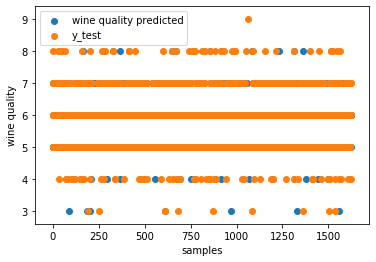

In [421]:
# For multiclass classification of wine quality, GradientBoostingClassifier
gbrt = GradientBoostingClassifier(n_estimators=80,random_state=0)
gbrt.fit(X_train, y_train)

wine_quality_predicted = gbrt.predict(X_test)
def plot_predict():
    plt.scatter(list(range(len(y_test))), wine_quality_predicted, label="wine quality predicted")
    plt.scatter(list(range(len(y_test))), y_test, label="y_test")
    plt.ylabel("wine quality")
    plt.xlabel("samples")
    plt.legend()
    
plot_predict()

/home/ubuntu/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


({'n_estimators': 80}, 0.583128078817734)